Урок 5. Рекуррентные нейронные сети

Рекуррентная нейроная сеть обученная складывать числа.

In [ ]:
import copy, numpy as np
np.random.seed(5)

# Сигмоида
def sigmoid(x):
	output = 1/(1 + np.exp(-x))
	return output
# Конвертируем значение функции сигмоиды в ее производную
def sigmoid_to_derivative(output):
	return output*(1 - output)

In [ ]:
binary_dim = 8

# Генерация тренировочного датасета
largest_number = pow(2, binary_dim)
binary = np.unpackbits(np.array([list(range(largest_number))], dtype=np.uint8).T, axis=1)

binary[2]

array([0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [ ]:
binary_dim = 8
int2binary = np.array()

# Генерация тренировочного датасета
largest_number = pow(2, binary_dim)
binary = np.unpackbits(np.array([list(range(largest_number))], dtype=np.uint8).T, axis=1)
for i in range(largest_number):
	int2binary[i] = binary[i]

# Входные переменные
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1

# Инициализация весов нейронной сети
synapse_0 = 2*np.random.random((input_dim, hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim, output_dim)) - 1
synapse_h = 2*np.random.random((hidden_dim, hidden_dim)) - 1

synapse_0_update = np.zeros_like(synapse_0)
synapse_1_update = np.zeros_like(synapse_1)
synapse_h_update = np.zeros_like(synapse_h)

TypeError: array() missing required argument 'object' (pos 0)

In [ ]:
# Генерация тренировочного датасета
largest_number = pow(2, binary_dim)
binary = np.unpackbits(np.array([list(range(largest_number))], dtype=np.uint8).T, axis=1)
for i in range(largest_number):
	int2binary[i] = binary[i]

# Входные переменные
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1

# Инициализация весов нейронной сети
synapse_0 = 2*np.random.random((input_dim, hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim, output_dim)) - 1
synapse_h = 2*np.random.random((hidden_dim, hidden_dim)) - 1

synapse_0_update = np.zeros_like(synapse_0)
synapse_1_update = np.zeros_like(synapse_1)
synapse_h_update = np.zeros_like(synapse_h)

NameError: name 'int2binary' is not defined

In [ ]:
# Тренировочная логика
for j in range(10000):
	# Генерация простой проблемы сложения (a + b = c)
  a_int = np.random.randint(largest_number / 2) # int version
  a = int2binary[a_int] # Бинарное кодирование

  b_int = np.random.randint(largest_number/2) # int version
  b = int2binary[b_int] # Бинарное кодирование

  # Правильный ответ
  c_int = a_int + b_int
  c = int2binary[c_int]

  # Место где мы располагаем наши лучшие результаты (бинарно закодированные)
  d = np.zeros_like(c)
  overallError = 0
  layer_2_deltas = list()
  layer_1_values = list()
  layer_1_values.append(np.zeros(hidden_dim))

  # Движение вдоль позиции бинарной кодировки (идем вдоль последовательности)
  for position in range(binary_dim):
    # input and output generation
    X = np.array([[a[binary_dim - position - 1], b[binary_dim - position - 1]]])
    y = np.array([[c[binary_dim - position -1]]]).T

    # Внутренний слой (input + предыдущий внутренний)
    layer_1 = sigmoid(np.dot(X, synapse_0) + np.dot(layer_1_values[-1], synapse_h))

    # Output layer (новое бинарное представление)
    layer_2 = sigmoid(np.dot(layer_1, synapse_1))

    # Проверка упустили ли мы что-то и если, да то как много
    layer_2_error = y - layer_2
    layer_2_deltas.append((layer_2_error) * sigmoid_to_derivative(layer_2))
    overallError += np.abs(layer_2_error[0])

    # Декодируем оценку чтобы мы могли ее вывести на экран
    d[binary_dim - position - 1] = np.round(layer_2[0][0])

    # Сохраняем внутренний слой, чтобы мы могли его использовать в след. timestep
    layer_1_values.append(copy.deepcopy(layer_1))

  future_layer_1_delta = np.zeros(hidden_dim)

  for position in range(binary_dim):
	  X = np.array([[a[position], b[position]]])
	  layer_1 = layer_1_values[-position - 1]
	  prev_layer_1 = layer_1_values[-position - 2]

	  # Величина ошибки в output layer
	  layer_2_delta = layer_2_deltas[-position - 1]
	  # Величина ошибки в hidden layer
	  layer_1_delta = (future_layer_1_delta.dot(synapse_h.T) + layer_2_delta.dot(synapse_1.T)) * sigmoid_to_derivative(layer_1)
	  # Обновление всех весов и пробуем заново
	  synapse_1_update += np.atleast_2d(layer_1).T.dot(layer_2_delta)
	  synapse_h_update += np.atleast_2d(prev_layer_1).T.dot(layer_1_delta)
	  synapse_0_update += X.T.dot(layer_1_delta)

	  future_layer_1_delta = layer_1_delta

  synapse_0 += synapse_0_update * alpha
  synapse_1 += synapse_1_update * alpha
  synapse_h += synapse_h_update * alpha

  synapse_0_update *= 0
  synapse_1_update *= 0
  synapse_h_update *= 0

  # Вывод на экран процесса обучения
  if (j % 500 == 0):
    print('Error:' + str(overallError) + ' step number - ' + str(j))
    print('Pred:' + str(d))
    print('True:' + str(c))
    out = 0
    for index, x in enumerate(reversed(d)):
      out += x * pow(2, index)
    print(str(a_int) + ' + ' + str(b_int) + ' = ' + str(out) + ' (' + str(c_int) + ')')
    print('------------------')

In [ ]:
a_int = int(input('Первое число ?'))
a = int2binary[a_int] # Бинарное кодирование
b_int = int(input('Второе число ?'))
b = int2binary[b_int] # Бинарное кодирование
# c_int = a_int + b_int
# c = int2binary[c_int]
d = np.zeros_like(a)
layer_2_deltas = list()
layer_1_values = list()
layer_1_values.append(np.zeros(hidden_dim))

for position in range(binary_dim):
	# input and output generation
	X = np.array([[a[binary_dim - position - 1], b[binary_dim - position - 1]]])

	# Внутренний слой (input + предыдущий внутренний)
	layer_1 = sigmoid(np.dot(X, synapse_0) + np.dot(layer_1_values[-1], synapse_h))

	# Output layer (новое бинарное представление)
	layer_2 = sigmoid(np.dot(layer_1, synapse_1))

	# Декодируем оценку чтобы мы могли ее вывести на экран
	d[binary_dim - position - 1] = np.round(layer_2[0][0])
	layer_1_values.append(copy.deepcopy(layer_1))

out = 0
for index, x in enumerate(reversed(d)):
	out += x * pow(2, index)
print(f'Ответ - {out}')

Второй учебный пример реализации LSTM

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, GRU, SimpleRNN, LSTM, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import tensorflow as tf

In [ ]:
xLen = 10 # длина истории
n=5 # длина вектора данных

x = Input(shape = (xLen, n,))
y = LSTM(32, return_sequences = True)(x)
y1 = LSTM(32, return_sequences = False)(y)

In [ ]:
y

<KerasTensor: shape=(None, 10, 32) dtype=float32 (created by layer 'lstm')>

In [ ]:
y1

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'lstm_1')>

In [ ]:
model = Model(x, y1)
model.compile(loss = 'mse', optimizer = 'Adam', metrics = ['mse'])

In [ ]:
xx = np.random.randn(1, xLen, n)
y.shape, xx.shape
yy = model.predict(xx)

1/1 [==============================] - 1s 922ms/step


In [ ]:
yy.shape

(1, 32)

In [ ]:
xx.shape

(1, 10, 5)

более прагматичный вариант

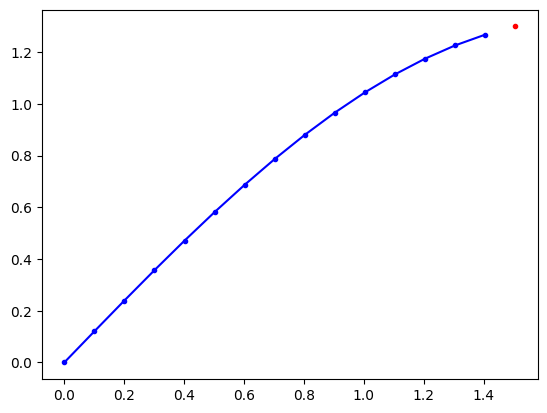

((284, 1), (284, 15, 2))

In [ ]:
N = 300
t = np.linspace(0, 30, N).reshape((N, 1))
x = np.sin(t) + t*0.2
n = 2
xLen = 15

plt.plot(t[0:xLen], x[0:xLen], '.-b')

h = 1 #горизонт прогноза
xx = []
y = []
for i in range(N-xLen - h):
	xx.append(np.concatenate((t[i:xLen + i], x[i:xLen + i])).reshape((xLen, 2)))
	y.append(x[i + h + xLen - 1])
xx = np.array(xx)
y = np.array(y)

plt.plot(t[xLen + h -1], y[0], '.r')
plt.show()
y.shape, xx.shape

In [ ]:
x_in = Input(shape = (xLen, n, ))
y_out = LSTM(164, return_sequences = False)(x_in)
y_out = Dense(1, activation = 'linear')(y_out)

model = Model(x_in, y_out)
model.compile(loss = 'mse', optimizer = 'Adam', metrics = ['mse'])

In [ ]:
x_in

<KerasTensor: shape=(None, 15, 2) dtype=float32 (created by layer 'input_2')>

In [ ]:
xx.shape

(284, 15, 2)

In [ ]:
test_n = 200
model.fit(xx[:test_n, :, :], y[:test_n], epochs = 20)

Epoch 1/20
7/7 [==============================] - 3s 6ms/step - loss: 2.0203 - mse: 2.0203
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.5921 - mse: 0.5921
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.3366 - mse: 0.3366
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 0.2157 - mse: 0.2157
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 0.2067 - mse: 0.2067
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1521 - mse: 0.1521
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1289 - mse: 0.1289
Epoch 8/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1194 - mse: 0.1194
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1077 - mse: 0.1077
Epoch 10/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1014 - mse: 0.1014
Epoch 11/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0901 - mse: 0.09

In [ ]:
ypred = model.predict(xx[test_n:, :, :])

3/3 [==============================] - 0s 4ms/step


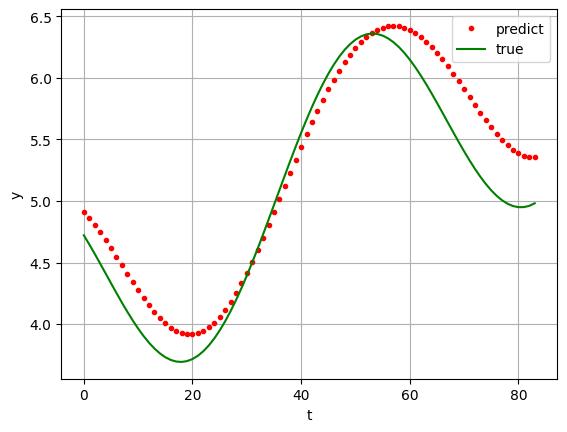

In [ ]:
plt.plot(ypred, '.r', label = 'predict')
plt.plot(y[test_n:], 'g', label = 'true')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

более прикладное - генерация текста

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


Разбор текста токенизация

In [ ]:

!wget https://gbcdn.mrgcdn.ru/uploads/asset/3196055/attachment/e4a02940fc8d378330731ae4f7eb7dd4.txt -O alice.txt

--2024-01-05 14:42:28--  https://gbcdn.mrgcdn.ru/uploads/asset/3196055/attachment/e4a02940fc8d378330731ae4f7eb7dd4.txt
Resolving gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)... 5.181.61.0
Connecting to gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)|5.181.61.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169855 (166K) [text/plain]
Saving to: ‘alice.txt’

alice.txt           100%[===================>] 165.87K  --.-KB/s    in 0.08s   

2024-01-05 14:42:29 (2.04 MB/s) - ‘alice.txt’ saved [169855/169855]



In [ ]:
tokenizer = Tokenizer(num_words=10000)
data = open('alice.txt').read()
corpus = data[711:].lower().split('\n')

In [ ]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i + 1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words)


In [ ]:
token_list

[3382, 4, 364, 1299, 3383, 4, 276, 38, 493, 619]

In [ ]:
tokenizer.index_word[12]

'alice'

In [ ]:
tokenizer.word_index['love']

1054

In [ ]:
input_sequences[5:15,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  12,  13],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  12,  13, 275],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  12,  13, 275,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         12,  13, 275,   4, 116],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,
         13, 275,   4, 116,  29],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  13,
        275,   4, 116,  29, 550],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  13, 275,
          4, 116,  29, 550,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  13, 275,   4,
        116,  29, 550,   6, 405],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12,  13, 275,   4, 116,
         29, 550,   6, 405,  59],
       [  0,   0,   0,   0,   0,   0,

In [ ]:
label.shape

(28138, 3384)

In [ ]:
# label.shape
total_words

3384

In [ ]:
callback = EarlyStopping(monitor = 'val_accuracy', patience = 15)

In [ ]:

model = Sequential()
model.add(Embedding(total_words, 256, input_length = max_sequence_len-1)) # вложение тренируемое для перехода от слова к его векторному коды
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный

model.add(Bidirectional(LSTM(50, return_sequences = True)))

model.add(LSTM(128))
# model.add(Dropout(0.2))
model.add(Dense(total_words/2, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

In [ ]:
history = model.fit(predictors, label, epochs = 5, validation_split=0.2, callbacks=[callback], verbose=1)

Epoch 1/5
704/704 [==============================] - 26s 22ms/step - loss: 6.2675 - accuracy: 0.0534 - val_loss: 7.1886 - val_accuracy: 0.0371
Epoch 2/5
704/704 [==============================] - 9s 13ms/step - loss: 5.8131 - accuracy: 0.0645 - val_loss: 7.3802 - val_accuracy: 0.0625
Epoch 3/5
704/704 [==============================] - 8s 11ms/step - loss: 5.5849 - accuracy: 0.0844 - val_loss: 7.6217 - val_accuracy: 0.0792
Epoch 4/5
704/704 [==============================] - 9s 13ms/step - loss: 5.3577 - accuracy: 0.1020 - val_loss: 7.9872 - val_accuracy: 0.0833
Epoch 5/5
704/704 [==============================] - 8s 12ms/step - loss: 5.1851 - accuracy: 0.1117 - val_loss: 7.7067 - val_accuracy: 0.1013


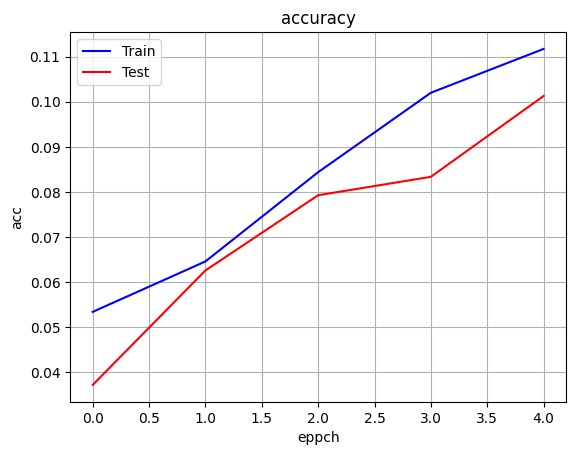

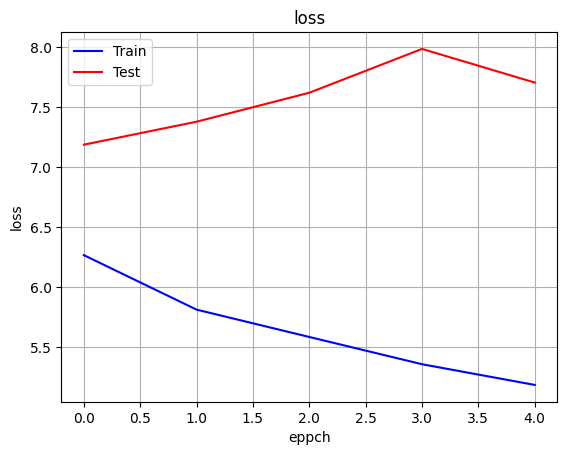

In [ ]:
acc = history.history['accuracy']
acc_v = history.history['val_accuracy']
loss = history.history['loss']
loss_v = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Train')
plt.plot(epochs, acc_v, 'r', label = 'Test')
plt.legend()
plt.title('accuracy')
plt.xlabel('eppch')
plt.ylabel('acc')
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'b', label = 'Train')
plt.plot(epochs, loss_v, 'r', label = 'Test')
plt.title('loss')
plt.xlabel('eppch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

Строим тест генератора


In [ ]:
# Начальная строка
seed_text = 'He set down every evil thought he had and renounced it'
next_words = 10
# строим последовательность и новое предсказание
for _ in range(next_words):
	# Текущая последовательность (токенизация и дополнение)
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	print(token_list)
	token_list = pad_sequences([token_list], maxlen = max_sequence_len -1, padding = 'pre')
	# Делаем предсказание (сразу как индекс класса - у нас 1 из 3384....)
	predicted = model.predict(token_list, verbose=0)
	predict_ = np.argmax(predicted)
	output_word = ''
	print(predict_)
	# Добавим новое слово в последовательность
	for word, index in tokenizer.word_index.items():
		if index == predict_:
			output_word = word
			break
	seed_text += ' ' + output_word
	print(seed_text)

[36, 206, 37, 347, 62, 36, 22, 3, 8]
13
He set down every evil thought he had and renounced it was
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13]
1
He set down every evil thought he had and renounced it was the
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1]
32
He set down every evil thought he had and renounced it was the little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32]
32
He set down every evil thought he had and renounced it was the little little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32, 32]
32
He set down every evil thought he had and renounced it was the little little little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32, 32, 32]
32
He set down every evil thought he had and renounced it was the little little little little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32, 32, 32, 32]
32
He set down every evil thought he had and renounced it was the little little little little little
[36, 206, 37, 347, 62, 36, 22, 3, 8, 13, 1, 32, 32, 32, 32, 32]
32
He set down every evil thought he

In [ ]:
y_p = model.predict(token_list)

1/1 [==============================] - 0s 19ms/step


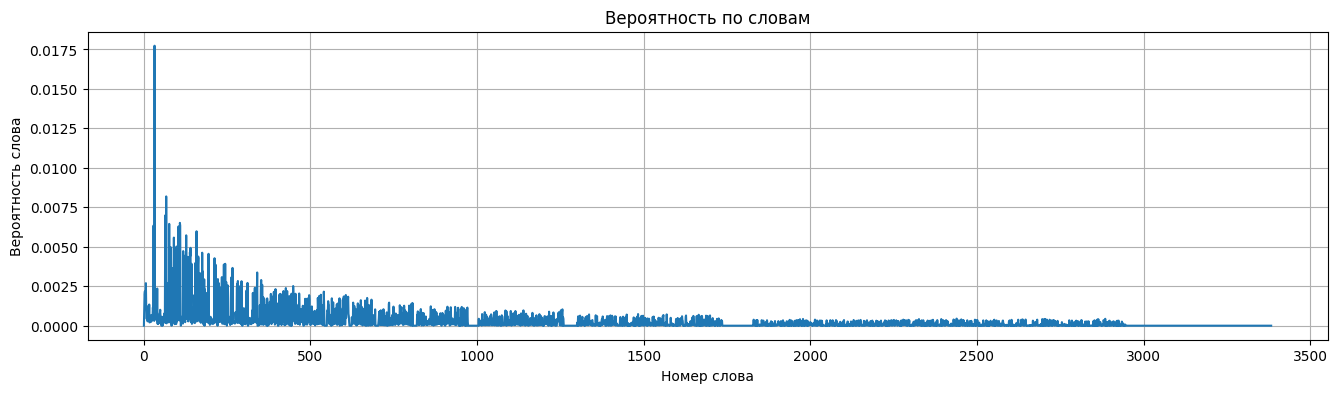

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(y_p[0,:])
plt.xlabel('Номер слова')
plt.ylabel('Вероятность слова')
plt.title('Вероятность по словам')
plt.grid('on')
plt.show()

## Временные ряды

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM
from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
import os
import datetime

In [ ]:
!wget https://gbcdn.mrgcdn.ru/uploads/asset/3196056/attachment/49718b914b30dae0983f1be37c32ec9d.csv -O airplane.csv
# data = open('airplane.csv').r

--2024-01-05 14:44:01--  https://gbcdn.mrgcdn.ru/uploads/asset/3196056/attachment/49718b914b30dae0983f1be37c32ec9d.csv
Resolving gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)... 5.181.61.0
Connecting to gbcdn.mrgcdn.ru (gbcdn.mrgcdn.ru)|5.181.61.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2037 (2.0K) [text/csv]
Saving to: ‘airplane.csv’

airplane.csv        100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-01-05 14:44:01 (1.17 GB/s) - ‘airplane.csv’ saved [2037/2037]



In [ ]:
data = pd.read_csv('airplane.csv')
data.index = data.Month
data.drop(['Month'], axis=1, inplace=True)
data.head(7)

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148


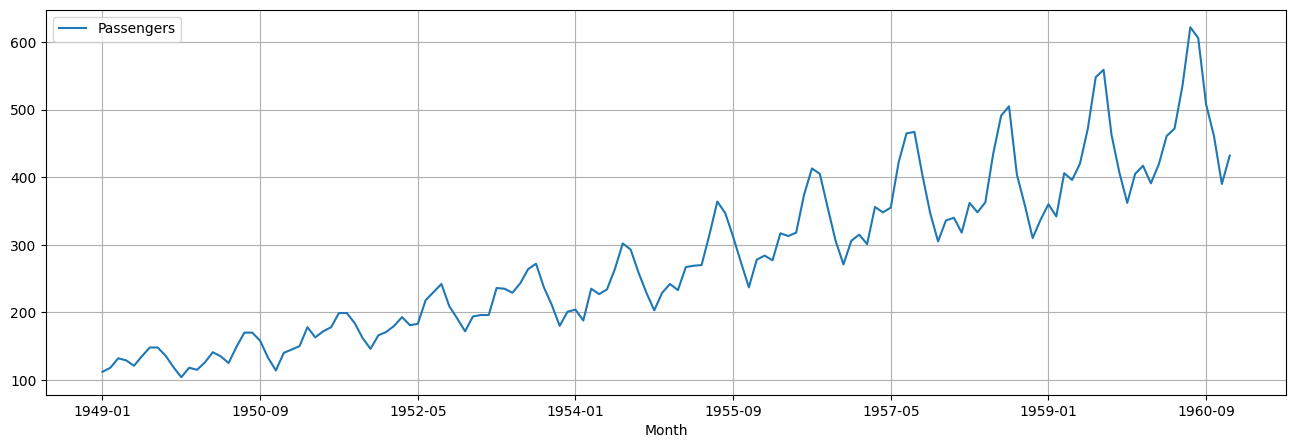

In [ ]:
data.plot(figsize = (16, 5))
plt.grid('On')

In [ ]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
# Добавим дату как признаки как месяц года /12  и год - 1949
data['month'] = pd.to_datetime(data.index).month / 12
data['year'] = (pd.to_datetime(data.index).year - 1949) / 11
data.head()

,Passengers,month,year
Month,,,
1949-01,112,0.083333,0.0
1949-02,118,0.166667,0.0
1949-03,132,0.250000,0.0
1949-04,129,0.333333,0.0
1949-05,121,0.416667,0.0


In [ ]:
# Делаем нормализацию
df = data.copy()
scaler = StandardScaler()
df['Passengers'] = scaler.fit_transform(df.Passengers.array.reshape((-1, 1)))
df

,Passengers,month,year
Month,,,
1949-01,-1.407779,0.083333,0.0
1949-02,-1.357590,0.166667,0.0
1949-03,-1.240483,0.250000,0.0
1949-04,-1.265578,0.333333,0.0
1949-05,-1.332496,0.416667,0.0
...,...,...,...
1960-08,2.724417,0.666667,1.0
1960-09,1.904669,0.750000,1.0
1960-10,1.511525,0.833333,1.0


In [ ]:
df = df.reset_index()
df.drop(['Month'], axis=1, inplace=True)

In [ ]:
df.head()

,Passengers,month,year
0,-1.407779,0.083333,0.0
1,-1.357590,0.166667,0.0
2,-1.240483,0.250000,0.0
3,-1.265578,0.333333,0.0
4,-1.332496,0.416667,0.0


In [ ]:
# Список признаков
channelIndexes = [0, 1, 2]
# Длина трейна
trainLen = 116
# Длина истории для работы
xLen = 6
# Отступ тестов от тренировок
bias = 10

# Делим
train_data = df.iloc[0:trainLen, channelIndexes]
# train_data = df.iloc[0:trainLen - bias, channelIndexes]
val_data = df.iloc[trainLen:, channelIndexes]

In [ ]:
# Формируем параметры для генерации выборки

# Шаг по данным для построения обучающих примеров
step = 1

# Длина прошлого
past = xLen
p = past

# горизонт предсказания
future = 1
h = future

# параметры модели для обучения
learning_rate = 0.001
batch_size = 32
epochs = 10

Выделяем части на обучение и проверку

In [ ]:
Chanel_numb = len(channelIndexes) # 3
start = xLen + future # 14+1=15
end = start + trainLen - 1 # 15 + 116 -1 = 131
xTrain_df = train_data.iloc[:- future - xLen + 1, :] # сдвиг по времени для предсказания (закончить чуть раньше)
xTrain = xTrain_df[[train_data.columns[i] for i in range(Chanel_numb)]].values
yTrain = train_data.iloc[future + xLen -1:, 0].values # Сдвиг по времени для предсказания (начать чуть позднее)
xVal_df = val_data.iloc[: - future - xLen +1, :] # сдвиг по времени для предсказания (закончить чуть раньше)
xVal = xVal_df[[val_data.columns[i] for i in range(Chanel_numb)]].values
yVal = val_data.iloc[future + xLen -1:, 0].values # Сдвиг по времени для предсказания (начать чуть позднее)

xTrain.shape, yTrain.shape

((110, 3), (110,))

In [ ]:
xVal.shape, yVal.shape

((22, 3), (22,))

Text(0.5, 1.0, 'Airpassengers')

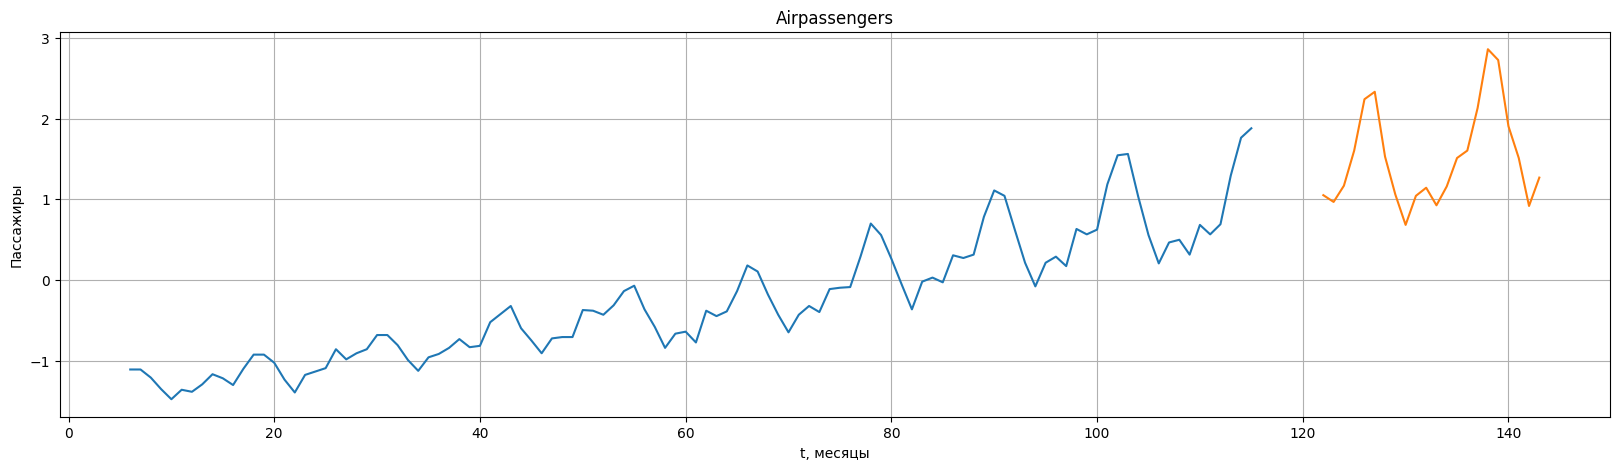

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(df.index[xLen:yTrain.shape[0] + xLen], yTrain[:])
# plt.plot(df.index[yTrain.shape[0] + bias + future + 2*xLen -1:], yVal[:])
plt.plot(df.index[yTrain.shape[0] + future + 2*xLen -1:], yVal[:])
plt.grid()
plt.xlabel('t, месяцы')
plt.ylabel('Пассажиры')
plt.title('Airpassengers')

In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    xTrain,
    yTrain,
    sequence_length = xLen,
    sampling_rate = 1,
    batch_size = batch_size,
)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    xVal,
    yVal,
    sequence_length = xLen,
    sampling_rate = 1,
    batch_size = batch_size,
)

In [ ]:
# Проверим, что все верно (для X[i, xLen, :] y[i] - необходимо контролировать, что X[i, xLen, 0] не входи y[i]
for batch in dataset_val.take(2):
	inputs, targets = batch
print('Input shape:', inputs.numpy().shape)
print('Target shape:', targets.numpy().shape)

Input shape: (17, 6, 3)
Target shape: (17,)


In [ ]:
callback = EarlyStopping(monitor='val_mae', patience=0)
model = Sequential()
model.add(LSTM(64, input_shape = (inputs.shape[1], inputs.shape[2]), return_sequences='True'))
model.add(LSTM(64, return_sequences = 'True'))
model.add(Conv1D(64, 3, activation = 'linear'))
model.add(Flatten())
model.add(Dense(3, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

history = model.fit(dataset_train, epochs = epochs, validation_data = dataset_val, callbacks = [callback])

Epoch 1/10
4/4 [==============================] - 7s 443ms/step - loss: 0.5673 - mae: 0.6376 - val_loss: 2.3428 - val_mae: 1.4158
Epoch 2/10
4/4 [==============================] - 0s 47ms/step - loss: 0.3482 - mae: 0.4837 - val_loss: 1.6801 - val_mae: 1.1417
Epoch 3/10
4/4 [==============================] - 0s 27ms/step - loss: 0.2150 - mae: 0.3765 - val_loss: 0.9741 - val_mae: 0.7969
Epoch 4/10
4/4 [==============================] - 0s 26ms/step - loss: 0.1545 - mae: 0.3213 - val_loss: 0.6000 - val_mae: 0.6649
Epoch 5/10
4/4 [==============================] - 0s 26ms/step - loss: 0.1500 - mae: 0.3238 - val_loss: 0.5436 - val_mae: 0.6234
Epoch 6/10
4/4 [==============================] - 0s 25ms/step - loss: 0.1202 - mae: 0.2815 - val_loss: 0.6434 - val_mae: 0.6444


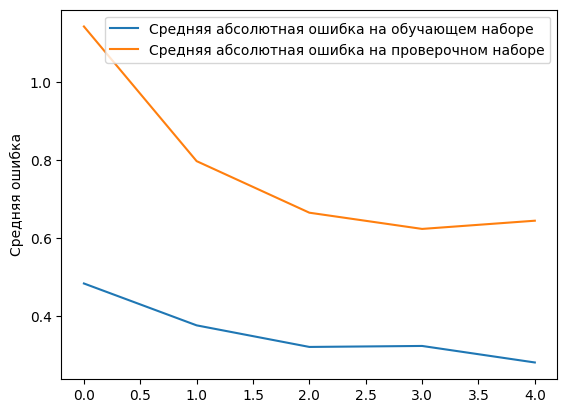

In [ ]:
plt.plot(history.history['mae'][1:], label = 'Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'][1:], label = 'Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
callback = EarlyStopping(monitor = 'val_mae', patience = 5)

model = Sequential()
model.add(LSTM(64, input_shape = (inputs.shape[1], inputs.shape[2]), return_sequences = 'True'))
model.add(Flatten())
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.000175), metrics = ['mae'])

history = model.fit(dataset_train, epochs=250, validation_data=dataset_val, callbacks=[callback])

Epoch 1/250
4/4 [==============================] - 3s 155ms/step - loss: 0.6266 - mae: 0.6800 - val_loss: 2.6239 - val_mae: 1.5182
Epoch 2/250
4/4 [==============================] - 0s 24ms/step - loss: 0.5737 - mae: 0.6493 - val_loss: 2.5039 - val_mae: 1.4783
Epoch 3/250
4/4 [==============================] - 0s 25ms/step - loss: 0.5324 - mae: 0.6241 - val_loss: 2.3819 - val_mae: 1.4364
Epoch 4/250
4/4 [==============================] - 0s 24ms/step - loss: 0.4946 - mae: 0.5999 - val_loss: 2.2622 - val_mae: 1.3939
Epoch 5/250
4/4 [==============================] - 0s 24ms/step - loss: 0.4594 - mae: 0.5763 - val_loss: 2.1459 - val_mae: 1.3513
Epoch 6/250
4/4 [==============================] - 0s 26ms/step - loss: 0.4264 - mae: 0.5533 - val_loss: 2.0337 - val_mae: 1.3087
Epoch 7/250
4/4 [==============================] - 0s 24ms/step - loss: 0.3953 - mae: 0.5306 - val_loss: 1.9257 - val_mae: 1.2662
Epoch 8/250
4/4 [==============================] - 0s 23ms/step - loss: 0.3661 - mae: 0.5

In [ ]:
history = model.fit(dataset_train, epochs=50, batch_size=1, validation_data=dataset_val, callbacks=[callback])

Epoch 1/50
4/4 [==============================] - 0s 25ms/step - loss: 0.0172 - mae: 0.1053 - val_loss: 0.0462 - val_mae: 0.1625
Epoch 2/50
4/4 [==============================] - 0s 24ms/step - loss: 0.0170 - mae: 0.1049 - val_loss: 0.0459 - val_mae: 0.1629
Epoch 3/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0169 - mae: 0.1045 - val_loss: 0.0456 - val_mae: 0.1632
Epoch 4/50
4/4 [==============================] - 0s 24ms/step - loss: 0.0168 - mae: 0.1041 - val_loss: 0.0453 - val_mae: 0.1635
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0167 - mae: 0.1037 - val_loss: 0.0450 - val_mae: 0.1638
Epoch 6/50
4/4 [==============================] - 0s 26ms/step - loss: 0.0165 - mae: 0.1033 - val_loss: 0.0447 - val_mae: 0.1640


In [ ]:
pred = model.predict(dataset_train).flatten()
predVal = model.predict(dataset_val).flatten()

1/1 [==============================] - 0s 44ms/step


In [ ]:
predVal

array([0.9510316 , 1.1534872 , 1.4188854 , 1.8286284 , 2.3141162 ,
       2.023235  , 1.6566507 , 1.0749737 , 0.6668656 , 0.58073854,
       0.70248705, 0.9619611 , 1.170683  , 1.3808471 , 1.7448453 ,
       2.2155209 , 2.681178  ], dtype=float32)

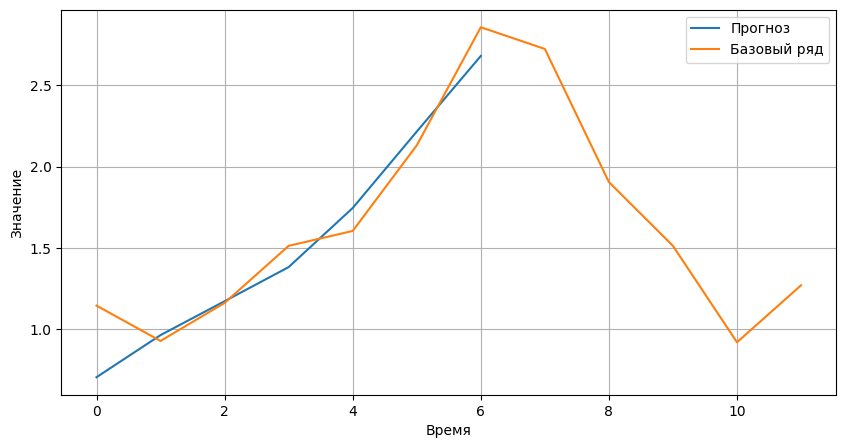

In [ ]:
start = 10
step = 100
plt.figure(figsize=(10,5))
plt.grid('on')
plt.plot(predVal[start:start+step], label='Прогноз')
plt.plot(yVal.flatten()[start:start+step], label = 'Базовый ряд')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

Проверим лаговые корреляции:

In [ ]:
def correlate(a, b):
	ma = a.mean()
	mb = b.mean()
	mab = (a*b).mean()
	sa = a.std()
	sb = b.std()
	val = 0
	if ((sa > 0) & (sb > 0)):
		val = (mab - ma*mb)/(sa*sb)
	return val

In [ ]:
len(predVal[:]), len(yVal[5:])

(17, 17)

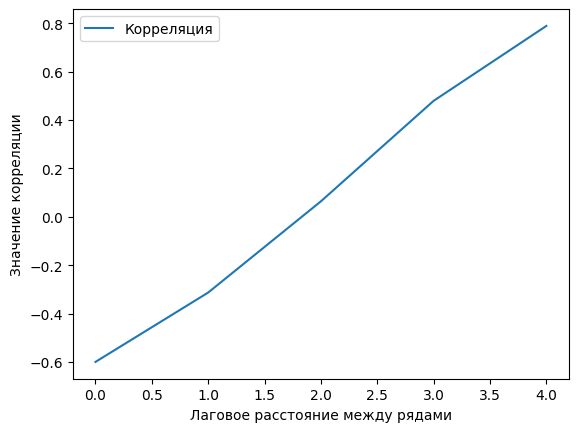

In [ ]:
corr = []
start = 5 # Начальная точка для проверки корреляций рядов
step = 150 # Число точек для проверки корреляций рядов
h = 0
yLen = yVal.shape[0]
yValF = yVal[start:] # Ряд истинных значений
yPredVal = predVal[:] # Ряд предсказаний
# Смотрим лаговые корреляции yValF[:-i], yPredVal[i:] для лагов от 0 до 5
for i in range(5):
	corr.append(correlate(yValF[:-1-i], yPredVal[i:-1]))

plt.plot(corr, label = 'Корреляция')
plt.xlabel('Лаговое расстояние между рядами')
plt.ylabel('Значение корреляции')
plt.legend()
plt.show()

## Урок 5. Рекуррентные нейронные сети
## Практическое задание

<ol>
    <li>Попробуйте изменить параметры нейронной сети, работающей с датасетом imdb, либо нейронной сети, работающей с airline-passengers (она прилагается вместе с датасетом к уроку в виде отдельного скрипта), так, чтобы улучшить ее точность. Приложите анализ.</li>
    <li>Попробуйте изменить параметры нейронной сети, генерирующей текст, таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившийся у вас текст и опишите то, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.</li>
    <li>* Попробуйте на numpy реализовать нейронную сеть архитектуры. LSTM</li>
    <li>* Предложите свои варианты решения проблемы исчезающего градиента в RNN.</li>
</ol>

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000

# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 100
batch_size = 256 #128 # увеличьте значение для ускорения обучения
def train_nn():
  print('Построение модели...')
  #model = Sequential()
  #model.add(Embedding(max_features, 128))
  #model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
  #model.add(Dense(32, activation='relu'))
  #model.add(Dense(1, activation='sigmoid'))

  model = Sequential()
  model.add(Embedding(max_features, 128))
  model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(32, activation='LeakyReLU'))
  model.add(Dropout(0.4))
  model.add(Dense(16, activation='elu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))


  print('Загрузка данных...')
 #стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров
  model.compile(loss='binary_crossentropy',
                optimizer='Adam', # при использовании этого оптимайзера модель показывает наилучшие результаты.
                metrics=['accuracy'])
  (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
  print(len(x_train), 'тренировочные последовательности')
  print(len(x_test), 'тестовые последовательности')

  print('Pad последовательности (примеров в x единицу времени)')
  x_train = pad_sequences(x_train, maxlen=maxlen)
  x_test = pad_sequences(x_test, maxlen=maxlen)
  print('x_train shape:', x_train.shape)
  print('x_test shape:', x_test.shape)

  print('Процесс обучения...')
  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10, # увеличьте при необходимости
            validation_data=(x_test, y_test))
  score, acc = model.evaluate(x_test, y_test,
                              batch_size=batch_size)
  print('Результат при тестировании:', score)
  print('Тестовая точность:', acc)



train_nn()
  #

Построение модели...
Загрузка данных...
17464789/17464789 [==============================] - 1s 0us/step
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Процесс обучения...
Epoch 1/10
98/98 [==============================] - 53s 472ms/step - loss: 0.5782 - accuracy: 0.6822 - val_loss: 0.3713 - val_accuracy: 0.8408
Epoch 2/10
98/98 [==============================] - 41s 414ms/step - loss: 0.3276 - accuracy: 0.8694 - val_loss: 0.3437 - val_accuracy: 0.8521
Epoch 3/10
98/98 [==============================] - 38s 389ms/step - loss: 0.2639 - accuracy: 0.9031 - val_loss: 0.3467 - val_accuracy: 0.8490
Epoch 4/10
98/98 [==============================] - 40s 409ms/step - loss: 0.2138 - accuracy: 0.9224 - val_loss: 0.3912 - val_accuracy: 0.8431
Epoch 5/10
98/98 [==============================] - 35s 360ms/step - loss: 0.1754 - accuracy: 0.9380 - val_loss: 0.4235 -

Слои дропаут повышают качество модели.

In [ ]:
batch_size = 128
maxlen = 128
from keras.layers import Dropout, ConvLSTM1D

In [ ]:
batch_size = 256
epochs = 20

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='LeakyReLU'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Use a different optimizer
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Train the model
model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test))


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [ ]:
from keras.backend import dropout
def train_nn_1():
  print('Загрузка данных...')
  (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
  print(len(x_train), 'тренировочные последовательности')
  print(len(x_test), 'тестовые последовательности')

  print('Pad последовательности (примеров в x единицу времени)')
  x_train = pad_sequences(x_train, maxlen=maxlen)
  x_test = pad_sequences(x_test, maxlen=maxlen)
  print('x_train shape:', x_train.shape)
  print('x_test shape:', x_test.shape)

  print('Построение модели...')
  model = Sequential()
  model.add(Embedding(max_features, 128))
  model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(32, activation='LeakyReLU'))            # New line
  model.add(Dropout(0.4))
  model.add(Dense(16, activation='elu'))
  model.add(Dropout(0.2))                                  # New line
  model.add(Dense(1, activation='sigmoid'))

  # стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров
  model.compile(loss='binary_crossentropy',
                optimizer='RMSprop', # при использовании этого оптимайзера модель показывает наилучшие результаты.
                metrics=['accuracy'])

  print('Процесс обучения...')
  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10, # увеличьте при необходимости
            validation_data=(x_test, y_test))
  score, acc = model.evaluate(x_test, y_test,
                              batch_size=batch_size)
  print('Результат при тестировании:', score)
  print('Тестовая точность:', acc)
train_nn_1()

Загрузка данных...
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)


x_train shape: (25000, 128)
x_test shape: (25000, 128)
Построение модели...
Процесс обучения...
Epoch 1/10
98/98 [==============================] - 59s 557ms/step - loss: 0.6845 - accuracy: 0.5523 - val_loss: 0.6127 - val_accuracy: 0.7154
Epoch 2/10
98/98 [==============================] - 49s 502ms/step - loss: 0.5007 - accuracy: 0.7755 - val_loss: 0.4104 - val_accuracy: 0.8234
Epoch 3/10
98/98 [==============================] - 47s 473ms/step - loss: 0.3981 - accuracy: 0.8389 - val_loss: 0.4247 - val_accuracy: 0.8053
Epoch 4/10
98/98 [==============================] - 48s 489ms/step - loss: 0.3414 - accuracy: 0.8658 - val_loss: 0.3247 - val_accuracy: 0.8604
Epoch 5/10
98/98 [==============================] - 47s 483ms/step - loss: 0.3144 - accuracy: 0.8788 - val_loss: 0.3205 - val_accuracy: 0.8635
Epoch 6/10
98/98 [==============================] - 48s 492ms/step - loss: 0.2885 - accuracy: 0.8916 - val_loss: 0.3350 - val_accuracy: 0.8640
Epoch 7/10
98/98 [============================

In [ ]:
from keras.datasets import imdb

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
X_train = x_train.reshape((x_train.shape[0], 1, 128, 1))
X_test = x_test.reshape((x_test.shape[0], 1, 128, 1))


In [ ]:
def train_nn_2(X_train, y_train,X_test, y_test):
  # print('Загрузка данных...')
  # (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
  # print(len(x_train), 'тренировочные последовательности')
  # print(len(x_test), 'тестовые последовательности')

  # print('Pad последовательности (примеров в x единицу времени)')
  # x_train = pad_sequences(x_train, maxlen=maxlen)
  # x_test = pad_sequences(x_test, maxlen=maxlen)
  # print('x_train shape:', x_train.shape)
  # print('x_test shape:', x_test.shape)

  print('Построение модели...')
  model = Sequential()
  #model.add(Embedding(max_features, 128))
  model.add(ConvLSTM1D(128,kernel_size=32, dropout=0.4, recurrent_dropout=0.4))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(32, activation='LeakyReLU'))            # New line
  model.add(Dropout(0.4))
  model.add(Dense(16, activation='elu'))
  model.add(Dropout(0.2))                                  # New line
  model.add(Dense(1, activation='sigmoid'))

  # стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров
  model.compile(loss='binary_crossentropy',
                optimizer='Adam', # при использовании этого оптимайзера модель показывает наилучшие результаты.
                metrics=['accuracy'])

  print('Процесс обучения...')
  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10, # увеличьте при необходимости
            validation_data=(x_test, y_test))
  score, acc = model.evaluate(x_test, y_test,
                              batch_size=batch_size)
  print('Результат при тестировании:', score)
  print('Тестовая точность:', acc)


In [ ]:
train_nn_1(X_train, y_train,X_test, y_test)

TypeError: train_nn_1() takes 0 positional arguments but 4 were given